In [ ]:
!unzip '/face.zip'

Archive:  /face.zip
  inflating: fake/easy_100_1111.jpg  
  inflating: fake/easy_101_0010.jpg  
  inflating: fake/easy_102_0101.jpg  
  inflating: fake/easy_103_1111.jpg  
  inflating: fake/easy_104_1000.jpg  
  inflating: fake/easy_105_1100.jpg  
  inflating: fake/easy_106_0011.jpg  
  inflating: fake/easy_107_1011.jpg  
  inflating: fake/easy_108_1111.jpg  
  inflating: fake/easy_109_1111.jpg  
  inflating: fake/easy_10_0001.jpg   
  inflating: fake/easy_110_0001.jpg  
  inflating: fake/easy_111_1101.jpg  
  inflating: fake/easy_112_1001.jpg  
  inflating: fake/easy_113_0011.jpg  
  inflating: fake/easy_114_1110.jpg  
  inflating: fake/easy_115_0010.jpg  
  inflating: fake/easy_116_111.jpg   
  inflating: fake/easy_117_0101.jpg  
  inflating: fake/easy_118_1111.jpg  
  inflating: fake/easy_119_0011.jpg  
  inflating: fake/easy_11_1111.jpg   
  inflating: fake/easy_120_0011.jpg  
  inflating: fake/easy_121_0011.jpg  
  inflating: fake/easy_122_1011.jpg  
  inflating: fake/easy_123_010

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/face'
img_datagen = ImageDataGenerator(
    rotation_range = 0.45,
    width_shift_range = 0.2
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

Gunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada data


In [ ]:
img_generator = img_datagen.flow_from_directory(
    img_path,
    target_size = (150,150),
    batch_size = 32
)

Found 2041 images belonging to 2 classes.


Split dataset menjadi train,val dan test

In [ ]:
img_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    validation_split = 0.1
)

train_generator = img_datagen.flow_from_directory(
    img_path,
    target_size = (150,150),
    batch_size = 32,
    subset = 'training',
    class_mode = 'binary'
)

val_generator = img_datagen.flow_from_directory(
    img_path,
    target_size = (150,150),
    batch_size = 32,
    subset = 'validation',
    class_mode = 'binary'
)

test_generator = img_datagen.flow_from_directory(
    img_path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1837 images belonging to 2 classes.
Found 204 images belonging to 2 classes.
Found 2041 images belonging to 2 classes.


Gunakan sequential model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=[150, 150, 3]), #inputshape ngikuti target_size

    # hidden layer
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    # dense layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.84 and logs.get('val_accuracy') > 0.84):
            self.model.stop_training = True

Gunakan accuracy sebagai metrics

In [ ]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 10
)

Epoch 1/10
58/58 [==============================] - 706s 12s/step - loss: 1.0881 - accuracy: 0.5095 - val_loss: 0.7605 - val_accuracy: 0.5294
Epoch 2/10
58/58 [==============================] - 226s 4s/step - loss: 0.7080 - accuracy: 0.5188 - val_loss: 0.6928 - val_accuracy: 0.5294
Epoch 3/10
58/58 [==============================] - 227s 4s/step - loss: 0.6884 - accuracy: 0.5346 - val_loss: 0.7083 - val_accuracy: 0.5245
Epoch 4/10
58/58 [==============================] - 235s 4s/step - loss: 0.6780 - accuracy: 0.5759 - val_loss: 0.6720 - val_accuracy: 0.5833
Epoch 5/10
58/58 [==============================] - 230s 4s/step - loss: 0.6490 - accuracy: 0.6396 - val_loss: 0.6698 - val_accuracy: 0.6029
Epoch 6/10
58/58 [==============================] - 237s 4s/step - loss: 0.6562 - accuracy: 0.6151 - val_loss: 0.6780 - val_accuracy: 0.6225
Epoch 7/10
58/58 [==============================] - 230s 4s/step - loss: 0.6115 - accuracy: 0.6663 - val_loss: 0.6633 - val_accuracy: 0.6275
Epoch 8/10
5

In [ ]:
model.evaluate(val_generator)

7/7 [==============================] - 11s 1s/step - loss: 0.6974 - accuracy: 0.6029


[0.6974162459373474, 0.6029411554336548]

Buat grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

Text(0, 0.5, 'loss')

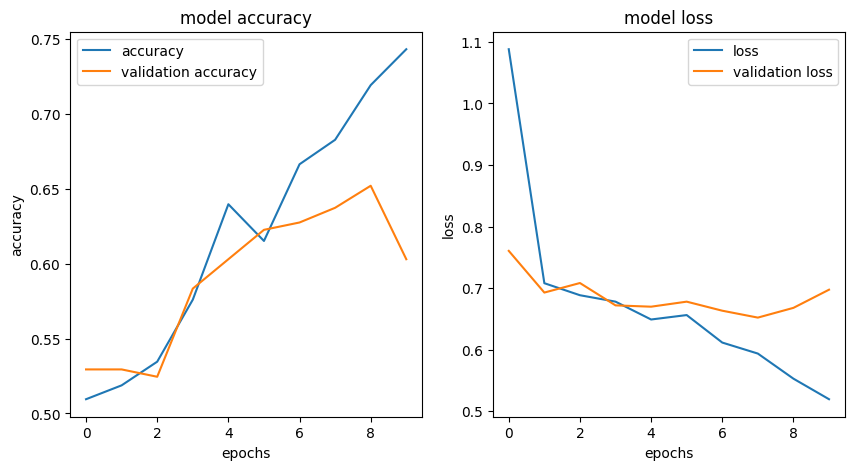

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")